In [4]:
import pandas as pd
import networkx as nx
print(nx.__version__)

3.1


# Import data

In [5]:
network_df=pd.read_csv("/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/abm_HS5/graph_data.csv")
network_df

,Unnamed: 0,source,target,weight
0,0,7,47,0.308373
1,1,7,21,0.173196
2,2,7,36,0.289113
3,3,7,2,0.286444
4,4,7,46,0.415905
...,...,...,...,...
283,283,33,42,-1.597501
284,284,33,26,-1.501919
285,285,33,35,-1.129448
286,286,33,19,-1.556788


In [84]:
agents_df=pd.read_csv("/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/abm_HS5/agent_data.csv")
agents_df

,Step,AgentID,Info,PersonalizedTrust,GeneralizedTrust,Wealth,Suspectability,ID,SecurityLevel
0,2,18,0,0.076129,0.096115,7.466380,0.532469,18,1.213745
1,2,41,0,0.055738,0.046416,4.326126,0.154025,41,1.477055
2,2,33,0,-1.425691,-1.181434,4.408158,0.073550,33,1.231886
3,2,4,0,0.131693,0.216884,2.405638,0.208211,4,1.024628
4,2,1,0,0.533525,0.500832,3.495436,0.216237,1,1.304080
...,...,...,...,...,...,...,...,...,...
295,7,22,0,1.161643,1.000000,8.046623,0.269230,22,1.120685
296,7,3,0,0.317636,0.268076,8.477878,0.436922,3,1.304055
297,7,49,0,-0.532079,-0.527674,5.018799,0.518271,49,1.182237
298,7,30,0,1.303888,1.000000,8.601630,0.898008,30,1.087868


In [7]:
network_df=network_df[network_df["weight"]>0]
network_df

,Unnamed: 0,source,target,weight
0,0,7,47,0.308373
1,1,7,21,0.173196
2,2,7,36,0.289113
3,3,7,2,0.286444
4,4,7,46,0.415905
...,...,...,...,...
271,271,43,5,0.176491
272,272,43,2,0.185623
273,273,43,12,0.073547
274,274,43,30,0.156143


In [9]:
G = nx.from_pandas_edgelist(network_df, create_using = nx.DiGraph)

In [12]:
#nx.info(G)

# Test if nodes load properly

In [13]:
len(G.nodes)

50

In [14]:
def show_nodes(G):
    nodes = sorted(list(G.nodes()))
    return ', '.join(nodes)
#only works with string names for nodes

In [15]:
G.nodes

NodeView((7, 47, 21, 36, 2, 46, 44, 34, 32, 18, 17, 20, 29, 28, 37, 30, 23, 13, 10, 3, 39, 38, 42, 40, 12, 4, 0, 26, 6, 33, 27, 9, 22, 8, 35, 24, 1, 45, 14, 25, 31, 16, 43, 48, 15, 41, 5, 49, 19, 11))

# Test edges

In [16]:
G.edges

OutEdgeView([(7, 47), (7, 21), (7, 36), (7, 2), (7, 46), (7, 44), (47, 7), (47, 34), (47, 32), (47, 21), (47, 18), (47, 17), (36, 30), (36, 32), (36, 7), (36, 26), (36, 22), (36, 24), (46, 24), (46, 1), (46, 34), (46, 28), (46, 7), (46, 45), (34, 14), (34, 47), (34, 46), (34, 37), (34, 26), (18, 27), (18, 37), (18, 42), (18, 9), (18, 47), (18, 22), (17, 38), (17, 48), (17, 22), (17, 8), (17, 9), (17, 47), (20, 29), (20, 28), (20, 37), (20, 30), (20, 23), (20, 13), (30, 36), (30, 16), (30, 9), (30, 20), (30, 43), (10, 2), (10, 3), (10, 39), (10, 38), (10, 42), (3, 39), (3, 10), (3, 16), (3, 1), (3, 11), (39, 3), (39, 44), (39, 10), (39, 11), (39, 21), (40, 12), (40, 13), (40, 38), (40, 4), (40, 0), (40, 37), (4, 37), (4, 41), (4, 29), (4, 40), (4, 2), (4, 0), (0, 31), (0, 35), (0, 27), (0, 40), (0, 4), (26, 6), (26, 29), (26, 33), (26, 36), (26, 28), (26, 34), (27, 18), (27, 8), (27, 0), (27, 35), (27, 6), (22, 42), (22, 31), (22, 17), (22, 15), (22, 36), (22, 18), (35, 9), (35, 0), (35

In [20]:
G.is_directed

<bound method DiGraph.is_directed of <networkx.classes.digraph.DiGraph object at 0x7f0c9a480d90>>

# Draw Graph

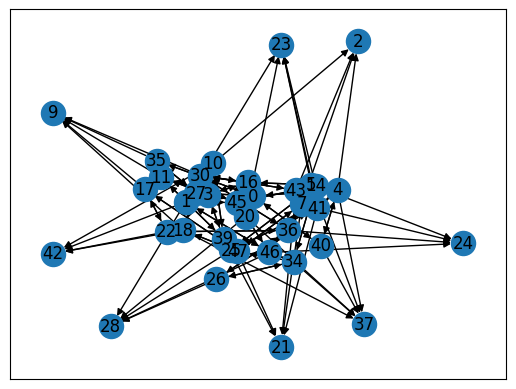

In [75]:
nx.draw_networkx(G,with_labels=True)

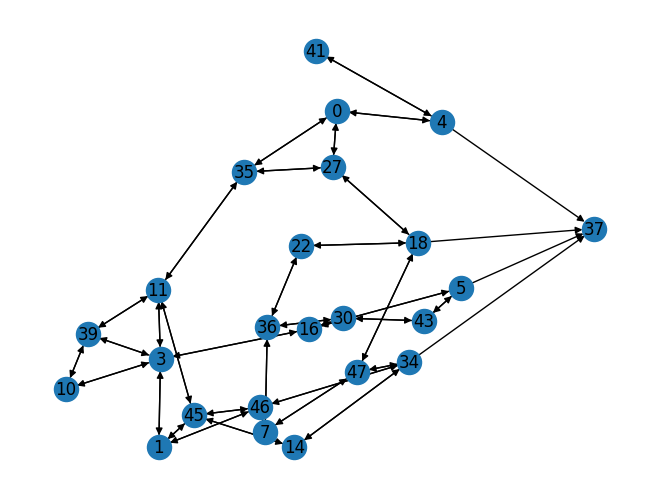

In [79]:
nx.draw_spring(G,with_labels=True)

# Network Analysis

- How big is the network?
- How complex is the network?
- What does the network visually look like?
- What are the most important nodes in the network?
- Are there islands, or just one big continent?
- What communities can be found in the network?
- What bridges exist in the network?
- What do the layers of the network reveal?

In [38]:
nx.average_clustering(G)

0.07168313561705732

In [39]:
from networkx.classes.function import density
density(G)

0.06489795918367347

## Remove node with only single edge through list comprehension

In [78]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 5]
G.remove_nodes_from(to_be_removed)

## Node Degrees

In [77]:
#Degree is the number of nodes in a network that a node is connected to.
degrees = dict(nx.degree(G))
degrees

{7: 8,
 47: 9,
 21: 5,
 36: 9,
 2: 4,
 46: 10,
 34: 9,
 18: 9,
 17: 5,
 20: 5,
 28: 5,
 37: 6,
 30: 9,
 23: 5,
 10: 6,
 3: 10,
 39: 7,
 42: 4,
 40: 5,
 4: 8,
 0: 8,
 26: 5,
 27: 6,
 9: 5,
 22: 7,
 35: 7,
 24: 4,
 1: 9,
 45: 8,
 14: 8,
 25: 5,
 16: 6,
 43: 6,
 41: 7,
 5: 6,
 11: 9}

In [82]:
in_degree={}
for key,value in G.in_degree():
    in_degree[key]=value
in_degree

{7: 3,
 47: 3,
 36: 3,
 46: 4,
 34: 3,
 18: 3,
 37: 4,
 30: 3,
 10: 2,
 3: 5,
 39: 3,
 4: 2,
 0: 3,
 27: 3,
 22: 2,
 35: 3,
 1: 3,
 45: 4,
 14: 2,
 16: 3,
 43: 2,
 41: 1,
 5: 2,
 11: 4}

In [83]:
out_degree={}
for key,value in G.out_degree():
    out_degree[key]=value
out_degree

{7: 3,
 47: 3,
 36: 3,
 46: 4,
 34: 4,
 18: 4,
 37: 0,
 30: 3,
 10: 2,
 3: 5,
 39: 3,
 4: 3,
 0: 3,
 27: 3,
 22: 2,
 35: 3,
 1: 3,
 45: 4,
 14: 2,
 16: 3,
 43: 2,
 41: 1,
 5: 3,
 11: 4}

In [41]:
#Degree centrality is the fraction of nodes in a network that a node is connected to.
degcent = nx.degree_centrality(G)
degcent

{7: 0.18367346938775508,
 47: 0.2040816326530612,
 21: 0.1020408163265306,
 36: 0.2040816326530612,
 2: 0.08163265306122448,
 46: 0.2040816326530612,
 44: 0.061224489795918366,
 34: 0.18367346938775508,
 32: 0.04081632653061224,
 18: 0.18367346938775508,
 17: 0.16326530612244897,
 20: 0.14285714285714285,
 29: 0.061224489795918366,
 28: 0.1020408163265306,
 37: 0.12244897959183673,
 30: 0.18367346938775508,
 23: 0.1020408163265306,
 13: 0.04081632653061224,
 10: 0.14285714285714285,
 3: 0.2040816326530612,
 39: 0.16326530612244897,
 38: 0.061224489795918366,
 42: 0.08163265306122448,
 40: 0.16326530612244897,
 12: 0.061224489795918366,
 4: 0.18367346938775508,
 0: 0.18367346938775508,
 26: 0.16326530612244897,
 6: 0.04081632653061224,
 33: 0.061224489795918366,
 27: 0.16326530612244897,
 9: 0.1020408163265306,
 22: 0.18367346938775508,
 8: 0.061224489795918366,
 35: 0.18367346938775508,
 24: 0.08163265306122448,
 1: 0.18367346938775508,
 45: 0.2040816326530612,
 14: 0.16326530612244897

In [42]:
#The PageRank mathematical formula considers the number of inbound and
#outbound degrees of not only a node in question but of the linking nodes as well.
pagerank = nx.pagerank(G)
pagerank

{7: 0.02008055147700588,
 47: 0.022258583345487457,
 21: 0.024681790627661123,
 36: 0.02206479256671176,
 2: 0.02148399698025431,
 46: 0.023657476521532283,
 44: 0.019201962615538776,
 34: 0.022824677517242122,
 32: 0.016729132057626623,
 18: 0.019637454539705456,
 17: 0.016246789895185482,
 20: 0.014103506695840047,
 29: 0.017574242269336286,
 28: 0.023642675503267818,
 37: 0.0264653699363175,
 30: 0.021491024806011064,
 23: 0.02344176677587614,
 13: 0.014830991406074885,
 10: 0.018880849541246605,
 3: 0.027657642125275942,
 39: 0.021938877175730998,
 38: 0.018344164051340293,
 42: 0.022185138449215686,
 40: 0.01682153293821741,
 12: 0.018750300728056682,
 4: 0.01872921109356856,
 0: 0.021871471205420358,
 26: 0.01745595441763419,
 6: 0.016313533001405322,
 33: 0.01824372103778489,
 27: 0.01994458692836549,
 9: 0.025759511178916516,
 22: 0.018659468096224038,
 8: 0.0184124313840034,
 35: 0.02113669242687419,
 24: 0.022502134191106925,
 1: 0.02188533391141274,
 45: 0.023876404815777543

# Community detection

In [43]:
import community as community_louvain  

In [44]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 

    cmap = cm.get_cmap('flag', max(partition.values()) + 1) 
    
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [45]:
partition = community_louvain.best_partition(G, resolution=2) 

TypeError: Bad graph type, use only non directed graph

In [43]:
draw_partition(G, partition) 

NameError: name 'partition' is not defined

In [44]:
community_df = pd.DataFrame(partition, index=[0]).T 
community_df.columns = ['community'] 
community_df.head() 

NameError: name 'partition' is not defined

In [45]:
community_df['community'].value_counts() 

NameError: name 'community_df' is not defined

In [46]:
def get_community_nodes(commmunity_df, partition): 

    community_nodes = community_df[community_df['community']==partition].index.to_list() 

    return community_nodes 

In [47]:
def draw_community(G, community_df, partition, node_size=3, show_names=False): 

    community_nodes = get_community_nodes(community_df, partition) 

    G_community = G.subgraph(community_nodes) 

    return draw_graph(G_community, node_size=node_size, show_names=show_names) 

In [48]:
draw_community(G, community_df, 1, show_names=True) # draw community 1

NameError: name 'community_df' is not defined